## Name: Nikhil Raghunath


## Case Study

The dataset is from a banking institute in the United States where they also provide car insurance services apart from other services. The bank is running a campaign to enrol new customers or to upsell to the existing insurance customers. It is a classic marketing campaign where companies, in this case a banking institute relies on communication channels such as phone calls as a suitable mean instead of contacting the potential customers via emails, text messages or social media.

The bank has the data for about 4000 customers that it contacted during the last campaign and their results and the aim is to identify potential customers who susbscribed for the insurance during the current campaign

### Dataset

The dataset has information regarding the bank car insurance customers and the data from the previous run marketing campaign. The total number of features in the dataset is 18, excluding the target feature which is CarInsurance. The features are a mixture of numerical, categorical and DateTime types. The brief Description of each of the feature is given below:

#### Dependent Variables

##### Id               
A Unique ID number for each record (Integer)

##### Age              
The Age of the customer (Integer)

##### Job              
The Job title of the customer (String)

##### Marital          
The Marital status of the customer (String)

##### Education        
Education level of the customer (String)

##### Default          
Has credit in default, "yes" - 1,"no" - 0 (Categorical)

##### Balance          
The current balance in the customer's account in USD (Integer)

##### HH Insurance     
Is the customer house insured, "yes" - 1,"no" - 0 (Categorical)

##### CarLoan          
Is the customer car purchased under loan, "yes" - 1,"no" - 0 (Categorical)

##### Communication    
The communication type of the campaign (String)

##### LastContactMonth 
The month the customer was last contacted (String)

##### LastContactDay   
The day the customer was last contacted (Integer)

##### CallStart        
The time in HH:MM:SS format when the call started (DateTime)

##### CallEnd          
The time in HH:MM:SS format when the call ended (DateTime)

##### NoOfContacts     
The count of times the customer was contacted regarding the car insurance (Integer)

##### DaysPassed       
The number of days passed since the last contact with the customer (Integer)

##### PrevAttempts     
The number of times the customer was contacted during the previous campaign (Integer)

##### Outcome          
Result of the previous campaign outcome (String)


#### Target variable

##### CarInsurance     
Has the client subscribed a CarInsurance,"yes" - 1,"no" - 0 (Categorical)

### Importing required python libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Importing the training dataset data

In [180]:
train = pd.read_csv('carInsurance_train.csv')

### Visualizations

The visualizations are a very powerful way of understanding the data without having to look deep into the dataset. The visualizations often provide us with key insights and patterns that are generally hidden from the naked eye. We try to visualize the features and try to understand the data better.

### Age

<AxesSubplot:xlabel='Age'>

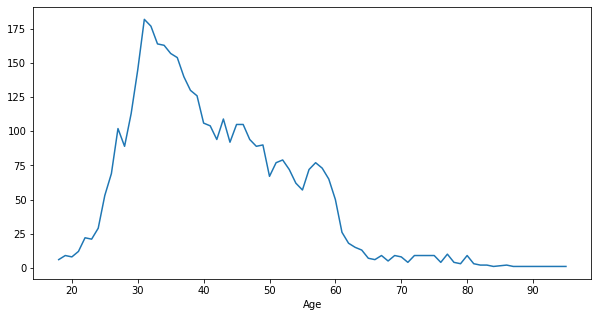

In [172]:
train.groupby('Age').count()["Id"].plot(kind="line",figsize=(10,5))

### Observation

The line plot for a numerical feature Age reveals that the people between 25-55 were the favorite age group to be targeted as they are the people who are most likely to drive a car and are in need of an insurance for their vehicle

### Job

<AxesSubplot:>

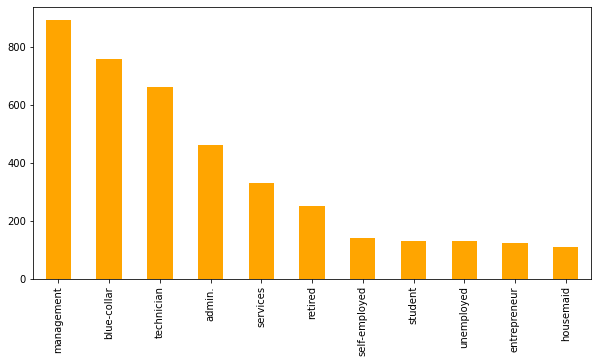

In [168]:
train['Job'].value_counts().plot.bar(color='Orange',figsize=(10,5))

### Observation

The bar plot for the job description of the customer shows that the working class people with a steady flow of income were targeted when compared customer who are retired or a student still or facing unemployment.

### Marital

<AxesSubplot:>

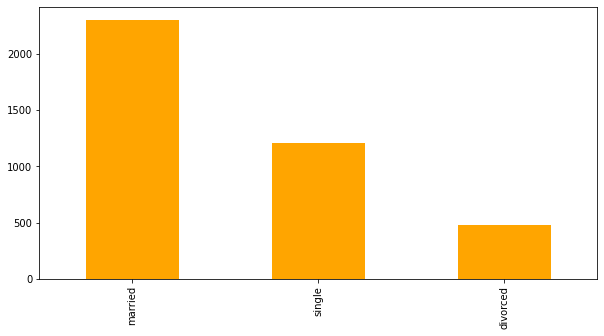

In [169]:
train['Marital'].value_counts().plot.bar(color='Orange',figsize=(10,5))

### Observation

The marital status of a customer bar plot reveals that the married customers were preferred when compared to customers who were single or divorcees. It could be because the married customer might happen to have multiple cars and the likelihood of them needing an insurance for their vehicle is higher

### Education

<AxesSubplot:>

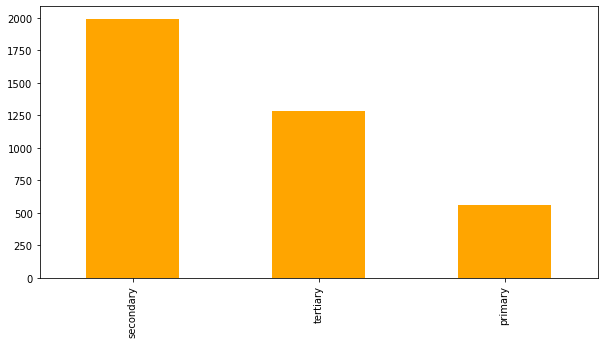

In [173]:
train['Education'].value_counts().plot.bar(color='Orange',figsize=(10,5))

### Observation

Education is always a key indicator as it is often correlated to the amount of money a person makes which in turns gives us an idea about a person's ability to purchase and maintain a car. As expected the customers with higher degree or education level were preferred 

### Communication

<AxesSubplot:>

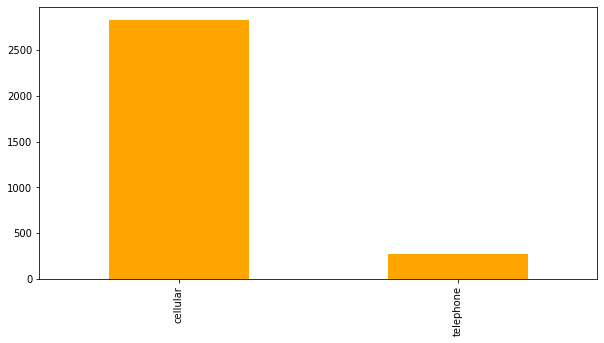

In [174]:
train['Communication'].value_counts().plot.bar(color='Orange',figsize=(10,5))

### Observation

The communication channel is a very important metric for a digital marketing campaign as it describes the best way to contact the customer which is key to sell a product. The bar plot reveals that the celluar/mobile way of communication was the way to go

### CarLoan

<AxesSubplot:>

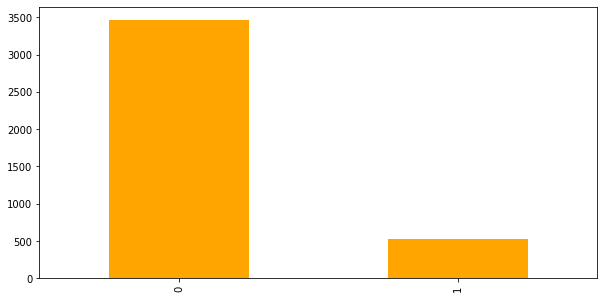

In [175]:
train['CarLoan'].value_counts().plot.bar(color='Orange',figsize=(10,5))

### Observation

The CarLoan feature describes whether a customer has purchased a car by taking a loan. The bar plot clearly favors those customers who have taken the loan as they might be more likely to purchase a car Insurance as well

### LastContactMonth

<AxesSubplot:xlabel='LastContactMonth'>

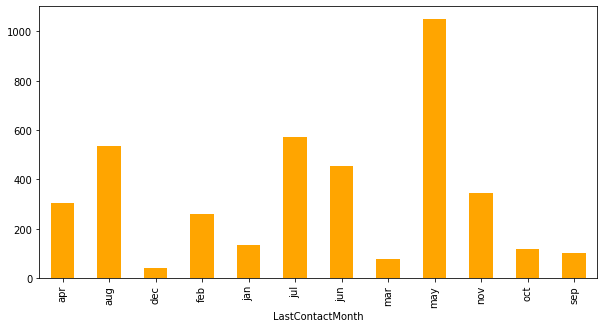

In [177]:
train.groupby('LastContactMonth').count()["Id"].plot(color='Orange',figsize=(10,5),kind="bar")

### Observation

The last contact month bar plot shows the summer months from May-July seem to the most favored months to contact the customers

### Correlation plot

<AxesSubplot:>

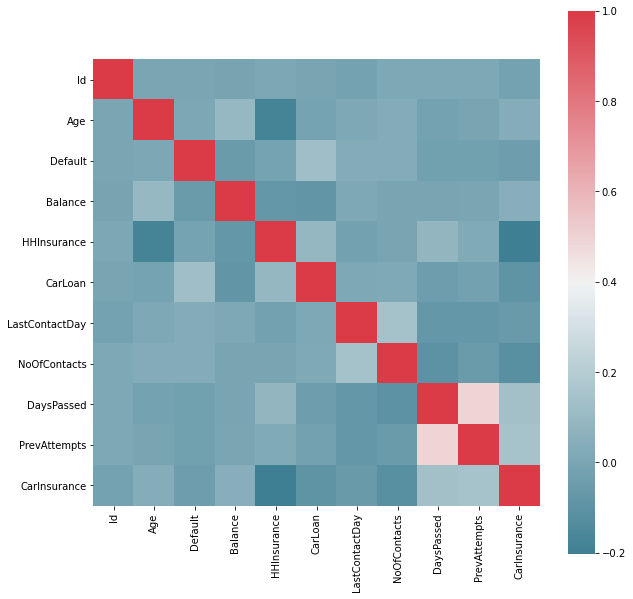

In [179]:
f, ax = plt.subplots(figsize=(10, 10))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Observation

The correlation plot is used to understand the relationship among the features. If there is a strong positive correlation among the features, it doesn't give unique information and one of them could be dropped. As we can see from the correlation plot, there is no high positive or negative correlation among the features and the target variable

In [181]:
train

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


### Observation

As we can see from the above dataframe, the total number of records are 4000 and the number of features including the target feature is 19. A quick glance at the dataframe values reveals that the dataset contains NaN(empty values) across multiple columns and it needs to be handled.

### Missing value info

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

### Observation

Diving deeper into the missing value information shows that 4 feature columns have missing values in them. Job, Education, communication and outcome are the columns with missing values. Each of these feature should be handled before modelling.

The "outcome" variable has the most missing values and going by the description of the feature,it explains the outcome of the previous campaign. It doesn't add much information to the current campaign and could be dropped.

Feature "Id", describes each row using a unique integer could be dropped 

Feature "default" describes if the customer has credit in default using a binary variable could also be dropped

Feature "PrevAttempts" describes the number of times the customer was contacted the previous campaign could also be dropped.

### Drop columns

In [209]:
df = train.drop(['Id','Default','PrevAttempts','Outcome'], axis=1)
df

,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,CallStart,CallEnd,CarInsurance
0,32,management,single,tertiary,1218,1,0,telephone,28,jan,2,-1,13:45:20,13:46:30,0
1,32,blue-collar,married,primary,1156,1,0,NaN,26,may,5,-1,14:49:03,14:52:08,0
2,29,management,single,tertiary,637,1,0,cellular,3,jun,1,119,16:30:24,16:36:04,1
3,25,student,single,primary,373,1,0,cellular,11,may,2,-1,12:06:43,12:20:22,1
4,30,management,married,tertiary,2694,0,0,cellular,3,jun,1,-1,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,technician,single,tertiary,0,1,0,cellular,25,may,1,40,17:46:28,17:50:57,1
3996,49,admin.,divorced,secondary,124,1,1,cellular,29,jul,19,-1,14:49:16,14:51:21,0
3997,27,admin.,single,secondary,-400,0,1,cellular,8,jul,1,-1,12:19:03,12:23:53,0
3998,36,entrepreneur,single,tertiary,658,1,0,cellular,29,jan,1,227,11:27:35,11:29:14,0


### Impute missing values

In [210]:
featureNames = ['Job','Education','Communication']

for feature in featureNames:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

### Observation

Handling of missing values is an essential part data processing where imputation is done to fill those values. The basis for imputation can be mean, mode etc. Since the missing value columns are categorical in nature and the visualization plot reveals that they are skewed towards a particular category, it is better to impute using the mode, which fills the missing values based on the most repeated category in the feature column

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               4000 non-null   object
 2   Marital           4000 non-null   object
 3   Education         4000 non-null   object
 4   Balance           4000 non-null   int64 
 5   HHInsurance       4000 non-null   int64 
 6   CarLoan           4000 non-null   int64 
 7   Communication     4000 non-null   object
 8   LastContactDay    4000 non-null   int64 
 9   LastContactMonth  4000 non-null   object
 10  NoOfContacts      4000 non-null   int64 
 11  DaysPassed        4000 non-null   int64 
 12  CallStart         4000 non-null   object
 13  CallEnd           4000 non-null   object
 14  CarInsurance      4000 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 468.9+ KB


### Observation

As you can see from the above dataframe info, there are no more missing records in the dataset and all feature columns are of same number of rows. But these categorical feature columns like Job, Education, Marital and communication are strings and they all need to be converted to numerical data to be processed. This process is called encoding. 

There are several ways encoding can be done. There is binary encoding for a feature having only 2 values, in this case the communication column. If there are more than 2 values and there is order between the values, in this case the education column, ordinal encoding can be done. If there are more than 2 values and there is no actual ordering between the "One-Hot encoding or dummy variable encoding" is to be done. In this case, the Job and marital needs to be one-hot encoded

### Binary variable

In [212]:
df['Communication'] = df['Communication'].replace({'telephone': 0, 'cellular': 1})

### Ordinal Variable

In [213]:
df['Education'] = df['Education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2})

In [214]:
df['LastContactMonth'] = df['LastContactMonth'].replace({
        'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11
    })

### Encode Job and marital features

In [215]:
column = ['Job','Marital']
for feature in column:
    df = df.copy()
    dummies = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(feature, axis=1)
df

,Age,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,...,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single
0,32,2,1218,1,0,0,28,0,2,-1,...,1,0,0,0,0,0,0,0,0,1
1,32,0,1156,1,0,1,26,4,5,-1,...,0,0,0,0,0,0,0,0,1,0
2,29,2,637,1,0,1,3,5,1,119,...,1,0,0,0,0,0,0,0,0,1
3,25,0,373,1,0,1,11,4,2,-1,...,0,0,0,0,1,0,0,0,0,1
4,30,2,2694,0,0,1,3,5,1,-1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,2,0,1,0,1,25,4,1,40,...,0,0,0,0,0,1,0,0,0,1
3996,49,1,124,1,1,1,29,6,19,-1,...,0,0,0,0,0,0,0,1,0,0
3997,27,1,-400,0,1,1,8,6,1,-1,...,0,0,0,0,0,0,0,0,0,1
3998,36,2,658,1,0,1,29,0,1,227,...,0,0,0,0,0,0,0,0,0,1


### Fetch the amount of seconds the call to the customer lasted

In [216]:
# Extract duration feature
df['CallDuration'] = (pd.to_datetime(df['CallEnd']) - pd.to_datetime(df['CallStart'])).apply(lambda x: x.seconds)
df = df.drop(['CallStart', 'CallEnd'], axis=1)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                4000 non-null   int64
 1   Education          4000 non-null   int64
 2   Balance            4000 non-null   int64
 3   HHInsurance        4000 non-null   int64
 4   CarLoan            4000 non-null   int64
 5   Communication      4000 non-null   int64
 6   LastContactDay     4000 non-null   int64
 7   LastContactMonth   4000 non-null   int64
 8   NoOfContacts       4000 non-null   int64
 9   DaysPassed         4000 non-null   int64
 10  CarInsurance       4000 non-null   int64
 11  Job_admin.         4000 non-null   uint8
 12  Job_blue-collar    4000 non-null   uint8
 13  Job_entrepreneur   4000 non-null   uint8
 14  Job_housemaid      4000 non-null   uint8
 15  Job_management     4000 non-null   uint8
 16  Job_retired        4000 non-null   uint8
 17  Job_self-emplo

### Observation

After imputation and handling of missing values the dataframe is all numerical now and is ready for modelling purposes

### Machine Learning

In [218]:
# Split df into X and y
y = df['CarInsurance']
X = df.drop('CarInsurance', axis=1)

In [219]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [220]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 1850 to 1061
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2800 non-null   float64
 1   Education          2800 non-null   float64
 2   Balance            2800 non-null   float64
 3   HHInsurance        2800 non-null   float64
 4   CarLoan            2800 non-null   float64
 5   Communication      2800 non-null   float64
 6   LastContactDay     2800 non-null   float64
 7   LastContactMonth   2800 non-null   float64
 8   NoOfContacts       2800 non-null   float64
 9   DaysPassed         2800 non-null   float64
 10  Job_admin.         2800 non-null   float64
 11  Job_blue-collar    2800 non-null   float64
 12  Job_entrepreneur   2800 non-null   float64
 13  Job_housemaid      2800 non-null   float64
 14  Job_management     2800 non-null   float64
 15  Job_retired        2800 non-null   float64
 16  Job_self-employed  28

### Vanilla ML models

### Decision Tree Classifier

In [240]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)*100
print("Best score on test set (accuracy) Decision Tree classifier = {:.4f}".format(classifier.score(X_test, y_test)*100))


Best score on test set (accuracy) Decision Tree classifier = 77.2500


### Logistic Regression

In [241]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)*100
print("Best score on test set (accuracy) Logistic regression classifier = {:.4f}".format(classifier.score(X_test, y_test)*100))


Best score on test set (accuracy) Logistic regression classifier = 77.7500


### K Nearest Neighbours

In [255]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)*100
print("Best score on test set (accuracy) KNN classifier = {:.4f}".format(classifier.score(X_test, y_test)*100))

Best score on test set (accuracy) KNN classifier = 72.8333


### Random Forest -- Ensemble

In [243]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)*100
print("Best score on test set (accuracy) Random Forest classifier = {:.4f}".format(classifier.score(X_test, y_test)*100))

Best score on test set (accuracy) Random Forest classifier = 82.9167


### Observation

Since the problem is a classification task, classifying algorithm have been used to predict the target variable, in this case CarInsurance. 4 Classification algorithms namely the logistic regression, decision trees,  K nearest neighbours and random forest ensemble techniques have been used.

As seen from the above results from the vanilla model, the KNN performed the worst. The accuracy of Logistic regression and decision tree classifier is almost identical at around 77%. The ensemble algorithm of random forests which builds multiple trees and takes the majority voting to decide on the target label has the highest accuracy at 82.91%

### Complex models based on hyperparamter tuning --GridSearchCV

Building a best possible ML model with the highest accuracy is the aim of all ML Engineers. The vanilla ML models might not always produce the best accuracy and there is always room for improvement. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. GridSearchCV from the scikit-learn library enables just this

GridSearch is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The best possible hyperparameters for a ML model is impossible to predict and by using GridSearch it enables looping through the parameters and produces the best possible model. The process could be done manually as well but it could take a considerable amount of time and resources

### Random Forests -GrisSearchCV

In [251]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [252]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   43.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.1s finished


In [253]:
best_clf.best_params_

{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=6,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'classifier__max_features': 6,
 'classifier__n_estimators': 100}

In [254]:
y_pred = best_clf.predict(X_test)
best_clf.score(X_test, y_test)*100

83.58333333333333

### Observation

As you can see from the above results, the gridSearch works by taking in series of parameters in the form of a dictionary and and loops through them to achieve the model with the highest accuracy. The best parameters for the model can also be obtained from the "best_params_"

The accuracy score for the gridSearchCV model is higher when compared to the vanilla random forest model

### SGDC Classifier -- GridSearchCV

In [221]:
params = {
    "cls__loss": ['log'],
    "cls__penalty": ["elasticnet"],
    "cls__l1_ratio": [0.15, 0.25, 0.5, 0.75],
}

pipe_en = Pipeline([
    ('scale', StandardScaler()),
    ('var_tresh', VarianceThreshold(threshold=(.8 * (1 - .8)))),
    ('feature_selection', SelectFromModel(lgbm.LGBMClassifier())),
    ('cls', SGDClassifier())
])

grid_en = GridSearchCV(pipe_en, params, scoring='accuracy', n_jobs=6, cv=5)
grid_en.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('var_tresh',
                                        VarianceThreshold(threshold=0.15999999999999998)),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                 class_weight=None,
                                                                                 colsample_bytree=1.0,
                                                                                 importance_type='split',
                                            

In [222]:
preds = grid_en.predict(X_test)
print("best score on validation set (accuracy) = {:.4f}".format(grid_en.best_score_))
print("best score on test set (accuracy) = {:.4f}".format(accuracy_score(y_test, preds)))

best score on validation set (accuracy) = 0.7546
best score on test set (accuracy) = 0.7375


### Logistic Regression -- GridSearchCV

In [225]:
params = {
    "cls__penalty": ["l1", "l2"],
    "cls__C": [0.5, 1, 2, 5],
    "cls__max_iter": [500]
}

pipe_lr = Pipeline([
    ('scale', StandardScaler()),
    ('var_tresh', VarianceThreshold(threshold=(.8 * (1 - .8)))),
    ('feature_selection', SelectFromModel(lgbm.LGBMClassifier())),
    ('cls', LogisticRegression())
])

grid_lr = GridSearchCV(pipe_lr, params, scoring='accuracy', n_jobs=6, cv=5)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('var_tresh',
                                        VarianceThreshold(threshold=0.15999999999999998)),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                 class_weight=None,
                                                                                 colsample_bytree=1.0,
                                                                                 importance_type='split',
                                            

In [226]:
preds = grid_lr.predict(X_test)
print("best score on validation set (accuracy) = {:.4f}".format(grid_lr.best_score_))
print("best score on test set (accuracy) = {:.4f}".format(accuracy_score(y_test, preds)))

best score on validation set (accuracy) = 0.7532
best score on test set (accuracy) = 0.7458


### KNN GridSearchCV

In [223]:
params = {
    "cls__n_neighbors": [1,2,3,4,5]
}

pipe_knn = Pipeline([
    ('scale', StandardScaler()),
    ('var_tresh', VarianceThreshold(threshold=(.8 * (1 - .8)))),
    ('feature_selection', SelectFromModel(lgbm.LGBMClassifier())),
    ('cls', KNeighborsClassifier())
])

grid_knn = GridSearchCV(pipe_knn, params, scoring='accuracy', n_jobs=6, cv=5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('var_tresh',
                                        VarianceThreshold(threshold=0.15999999999999998)),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                 class_weight=None,
                                                                                 colsample_bytree=1.0,
                                                                                 importance_type='split',
                                            

In [224]:
preds = grid_knn.predict(X_test)
print("best score on validation set (accuracy) = {:.4f}".format(grid_knn.best_score_))
print("best score on test set (accuracy) = {:.4f}".format(accuracy_score(y_test, preds)))

best score on validation set (accuracy) = 0.7868
best score on test set (accuracy) = 0.7967


### Observation

The gridSearchCV results for various classifiers can be seen above. It is clear that the Random Forest classifier perfomed the best with hyperparameter tuning with accuracy of about 83.58%. The SGDC Classifier which is an optimization technique on Logistic Regression produces accuracy of about 73.75% while the logistic regression resulted in accuracy of about 74.58%. The gridSearchCV helped improving the performance of KNN as the accuracy increased from 72.83% to 79.67%

### Best performing models

#### RandomForest (GridSearch)  --  83.58%
#### RandomForest(Vanilla)           --  82.91%
#### KNN(GridSearch)                    --  79.67%
#### Logistic Regression(Vanilla)  --  77.75%
#### Decision Trees(Vanilla            --  77.25%
#### Logistic Regression(GridSearchCV)  -- 74.58%
#### SGDC Classifier(GridSearchCV)         -- 73.75%
#### KNN(Vanilla) -- 72.83%

### Further improvements

The aim of the challenge was to build a classifier using one of the frameworks(XGBoost, Scikit-Learn, TensorFlow or PyTorch). The models in this experiment was built using the Scikit-Learn machine learning library. The accuracy of the vanilla models looked decent but further hyperparameter tuning on the models revealed that the accuracy of the models can be improved further. Variety of ML models have been built ranging from Logistic regression, decision trees and KNN to ensemble random forest algorithm. 

Further to this other classifiers like the SVM could be attempted with different kernel tricks to evaluate for the accuracy. The experiment solely focussed on evaluation accuracy of the models and other model evaluation metrics like the precision, recall, f1 score and the ROC curve have not been evaluated. It would be intersting to view those resulst and choose appropriate evaluation metric based on the business case.

The use of deep learning frameworks, tensorflow and PyTorch is out of scope in this challenge and only ML models have been built. The dataset is quite small is extracted anything ground breaking using deep learning techniques but further to the ML models, future experiments could also take into account using DL techniques to achieve higher State-of-art DL models

### Conclusion

The challenge of the dataset was that there were lot of missing data, imputation of them was the key to move forward and the most common imputation methodology of using mode(most repeated) was used. Since the dataset had a lot of categorical features, they had to be encoded to some kind of numerical form making sure that the model doesn't weigh them according to their numerical description. Hence the one-hot encoding was done to prevent that. Once the model was ready to be modelled, StandardScaler was used to ensure that the all the info in the dataframe was in the comparable scale.

Several ML models both Vanilla and the using GridSearchCV that automates the hyperparamater tuning were built and the results showed that the random forest model using gridSearchCV performed the best with the best accuracy among all the models at 83.58%. Several recommendations on further improving the models using different approaches and frameworks have been mentioned in the further improvements section.